In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

In [3]:
X = pd.read_csv('./data/dengue_features_train.csv')
y = pd.read_csv('./data/dengue_labels_train.csv')
X_test = pd.read_csv('./data/dengue_features_test.csv')

In [4]:
X.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [5]:
X_test.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [6]:
X_sj = X.loc[X['city'] =='sj'].copy()
y_sj = y.loc[y['city'] =='sj'].copy()

X_iq = X.loc[X['city'] =='iq'].copy()
y_iq = y.loc[y['city'] =='iq'].copy()

In [7]:
X_sj_test = X_test.loc[X_test['city'] == 'sj'].copy()
X_iq_test = X_test.loc[X_test['city'] == 'iq'].copy()

In [8]:
print(X_sj.shape, X_iq.shape)

(936, 24) (520, 24)


In [9]:
X_sj.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_iq.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_sj_test.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)
X_iq_test.drop(labels=['city', 'week_start_date'], axis=1,inplace=True)

In [10]:
X_sj['total_cases'] = y_sj.total_cases
X_iq['total_cases'] = y_iq.total_cases

Text(0.5, 1.0, 'San Juan Variable Correlations')

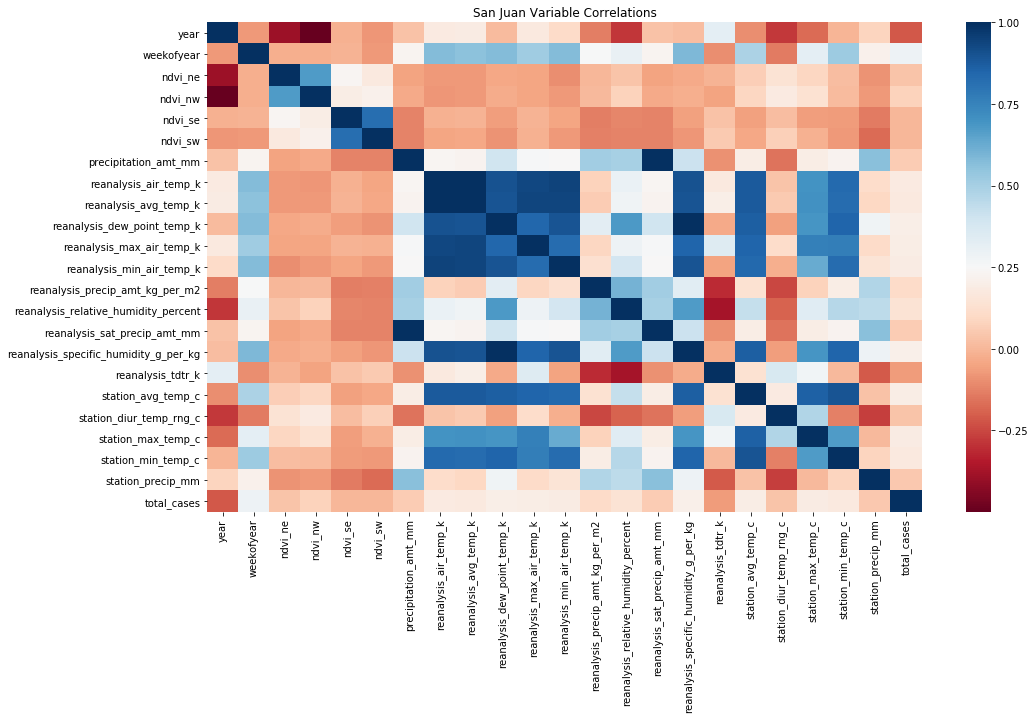

In [16]:
sns.heatmap(X_sj.corr(), cmap='RdBu')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

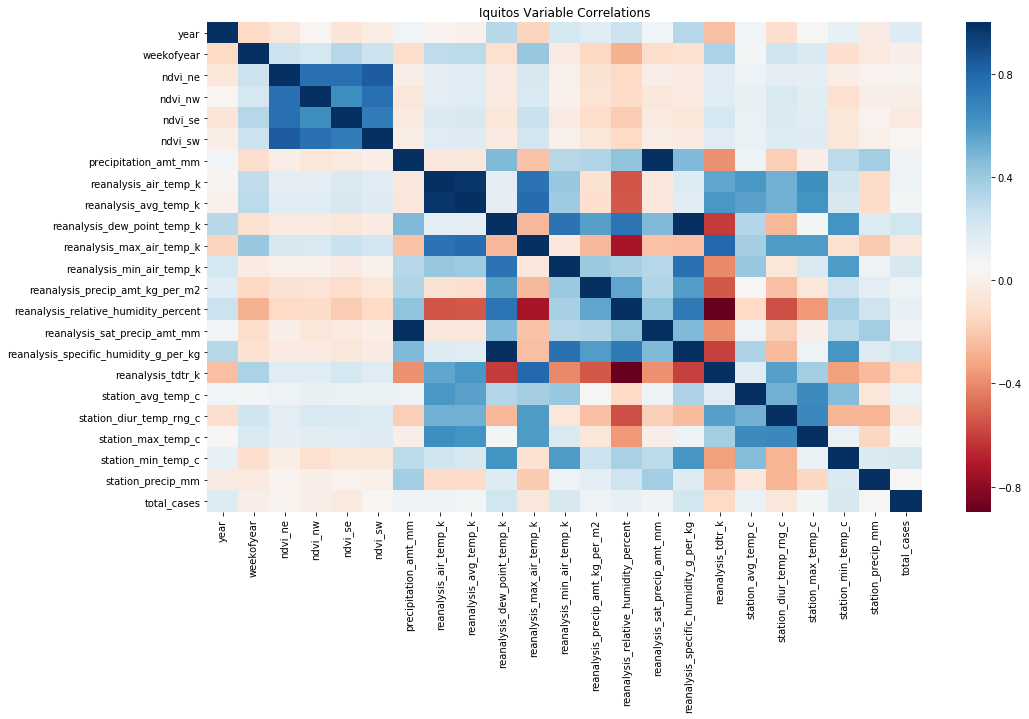

In [17]:
sns.heatmap(X_iq.corr(), cmap='RdBu')
plt.title('Iquitos Variable Correlations')

Text(0.5, 1.0, 'San Juan Variables Correlation with target variable (total_cases)')

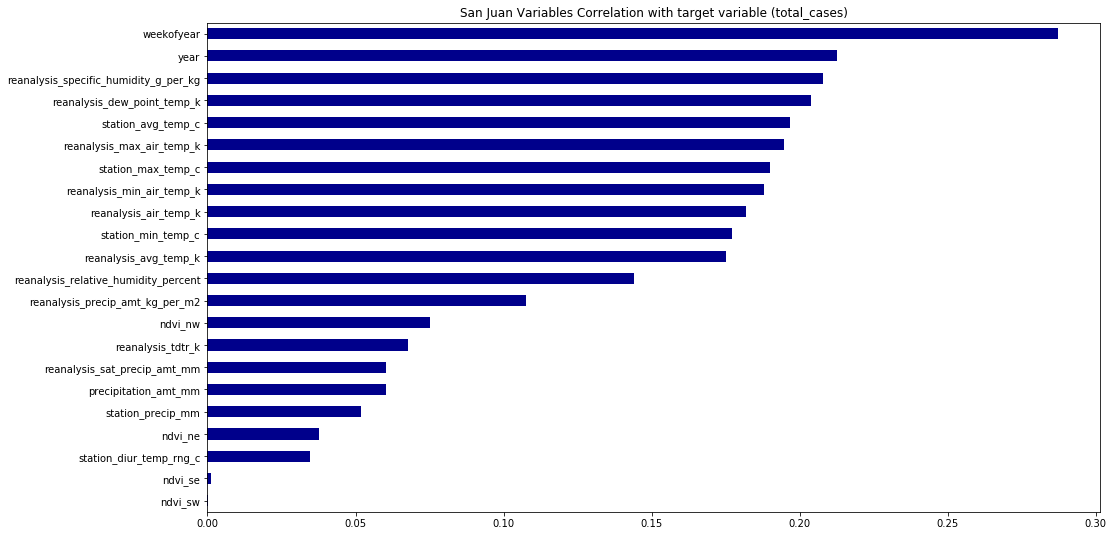

In [18]:
X_sj.corr().abs().total_cases.drop('total_cases').sort_values().plot.barh(color='darkblue')
plt.title('San Juan Variables Correlation with target variable (total_cases)')

Text(0.5, 1.0, 'Iquitos Variables Correlation with target variable (total_cases)')

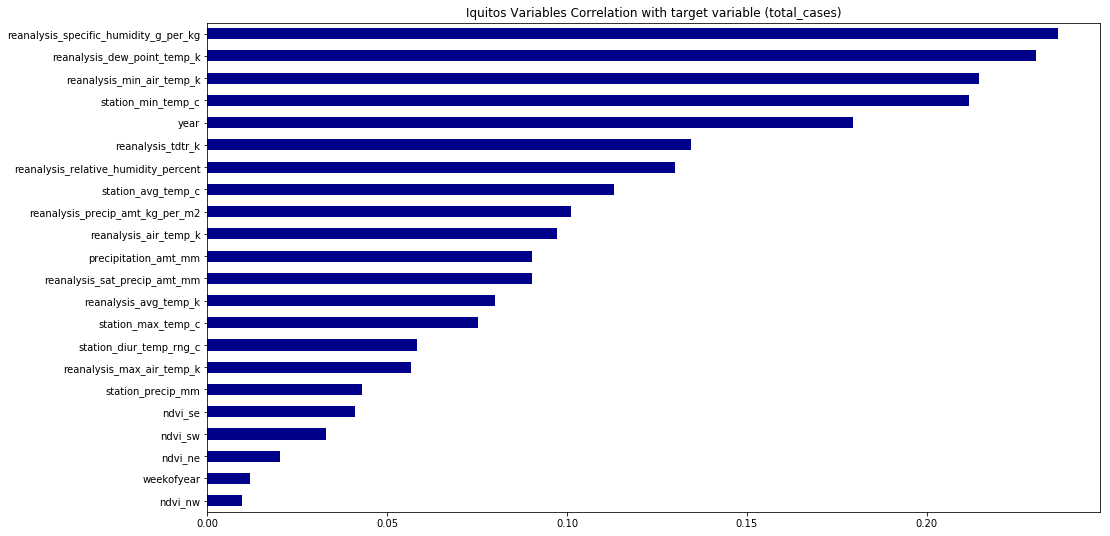

In [19]:
X_iq.corr().abs().total_cases.drop('total_cases').sort_values().plot.barh(color='darkblue')
plt.title('Iquitos Variables Correlation with target variable (total_cases)')

In [20]:
X_sj_medianf = X_sj.fillna(X_sj.median())
X_iq_medianf = X_iq.fillna(X_iq.median())
X_sj_test_medianf = X_sj_test.fillna(X_sj_test.median())
X_iq_test_medianf = X_iq_test.fillna(X_iq_test.median())

In [21]:
X_sj_medianf.drop('total_cases', axis=1, inplace=True)
X_iq_medianf.drop('total_cases', axis=1, inplace=True)

In [22]:
pca = PCA()
pca.fit(X_sj_medianf)
X_sj_pca = pca.transform(X_sj_medianf)
X_sj_pca_test = pca.transform(X_sj_test_medianf)

Text(0.5, 1.0, 'San Juan PCA')

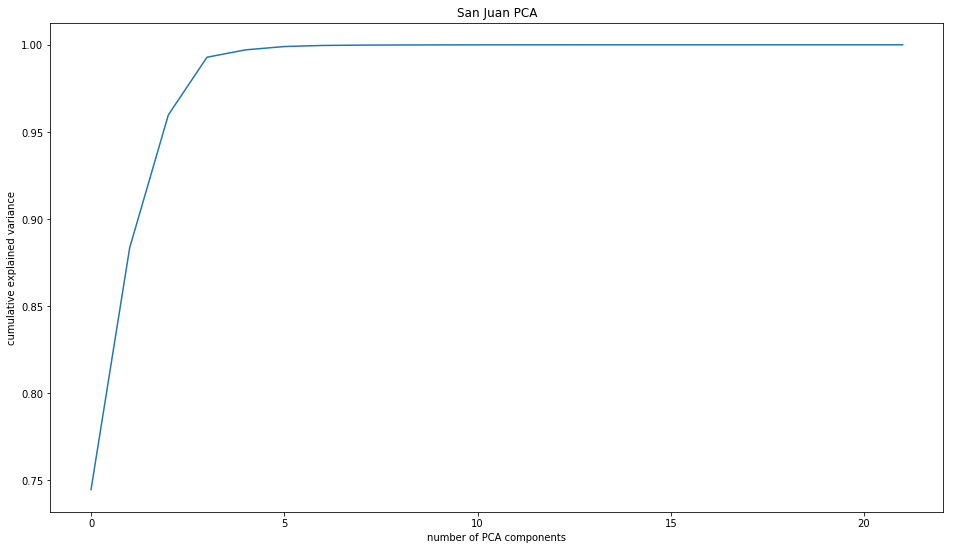

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of PCA components')
plt.ylabel('cumulative explained variance');
plt.title('San Juan PCA')

In [24]:
pca = PCA()
pca.fit(X_iq_medianf)
X_iq_pca = pca.transform(X_iq_medianf)
X_iq_pca_test = pca.transform(X_iq_test_medianf)

Text(0.5, 1.0, 'Iquitos PCA')

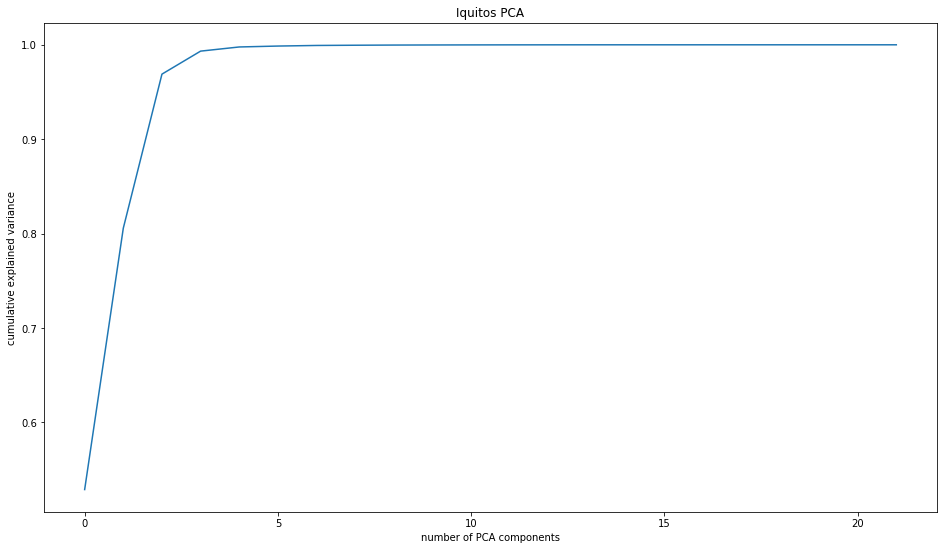

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of PCA components')
plt.ylabel('cumulative explained variance');
plt.title('Iquitos PCA')

In [23]:
sj_size = int(X_sj.shape[0] * 0.8)
iq_size = int(X_iq.shape[0] * 0.8)

In [28]:
X_sj.fillna(X_sj.median(), inplace=True)
X_iq.fillna(X_sj.median(), inplace=True)

In [29]:
train_sj = X_sj.head(sj_size).copy()
test_sj = X_sj.tail(X_sj.shape[0] - sj_size).copy()

train_iq = X_iq.head(iq_size).copy()
test_iq = X_iq.tail(X_iq.shape[0] - iq_size).copy()

In [34]:
train_sj.to_csv('./data/train_sj.csv', index=False)
test_sj.to_csv('./data/test_sj.csv', index=False)
train_iq.to_csv('./data/train_iq.csv', index=False)
test_sj.to_csv('./data/test_iq.csv', index=False)

In [28]:
X_sj_test.fillna(X_sj.median(), inplace=True)
X_iq_test.fillna(X_sj.median(), inplace=True)
X_sj_test.to_csv('./data/X_sj_test.csv', index=False)
X_iq_test.to_csv('./data/X_iq_test.csv', index=False)